In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("./data/lucas_organic_carbon_training_and_test_data.csv")

In [34]:
labels = pd.read_csv("./data/lucas_organic_carbon_target.csv")
labels

,x
0,very_low
1,very_low
2,very_low
3,moderate
4,low
...,...
9890,very_low
9891,very_low
9892,very_low
9893,very_low


In [35]:
# Basics
import numpy as np
# Pipeline
from sklearn.pipeline import Pipeline
# Scaler for standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
pipe = Pipeline([
('scaler', StandardScaler()),
])

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,695.0,695.5,696.0,696.5,697.0,697.5,698.0,698.5,699.0,699.5
0,-0.317694,-0.318224,-0.318744,-0.319256,-0.319759,-0.320253,-0.320739,-0.321217,-0.321686,-0.322148,...,-0.253999,-0.252081,-0.250094,-0.248047,-0.245931,-0.243811,-0.241630,-0.239438,-0.237224,-0.235007
1,0.256876,0.254926,0.252993,0.251076,0.249174,0.247289,0.245420,0.243566,0.241727,0.239904,...,-0.206513,-0.204793,-0.203048,-0.201278,-0.199468,-0.197638,-0.195817,-0.193995,-0.192134,-0.190302
2,0.091526,0.090582,0.089648,0.088721,0.087803,0.086892,0.085990,0.085095,0.084209,0.083330,...,0.029815,0.028596,0.027461,0.026368,0.025313,0.024333,0.023436,0.022613,0.021846,0.021101
3,-0.132203,-0.129195,-0.126215,-0.123263,-0.120339,-0.117442,-0.114573,-0.111730,-0.108914,-0.106124,...,0.521809,0.521874,0.521844,0.521739,0.521614,0.521434,0.521213,0.520945,0.520673,0.520356
4,0.536071,0.533381,0.530712,0.528063,0.525434,0.522825,0.520236,0.517667,0.515117,0.512587,...,0.507314,0.507371,0.507470,0.507579,0.507683,0.507796,0.507957,0.508128,0.508284,0.508405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,1.068931,1.065211,1.061515,1.057844,1.054196,1.050572,1.046972,1.043396,1.039844,1.036315,...,1.912247,1.912867,1.913158,1.913087,1.912711,1.912007,1.910965,1.909515,1.907806,1.905816
9891,-0.533231,-0.528060,-0.522935,-0.517854,-0.512817,-0.507825,-0.502875,-0.497969,-0.493105,-0.488283,...,1.872277,1.871760,1.871057,1.870189,1.869198,1.868090,1.866905,1.865635,1.864295,1.862915
9892,0.557028,0.562643,0.568195,0.573686,0.579116,0.584485,0.589796,0.595047,0.600241,0.605379,...,-0.676905,-0.682672,-0.688486,-0.694386,-0.700335,-0.706291,-0.712261,-0.718211,-0.724168,-0.730127
9893,0.121474,0.111586,0.101796,0.092101,0.082501,0.072994,0.063580,0.054258,0.045026,0.035884,...,-2.176860,-2.177269,-2.177631,-2.177959,-2.178292,-2.178629,-2.179044,-2.179508,-2.179996,-2.180489


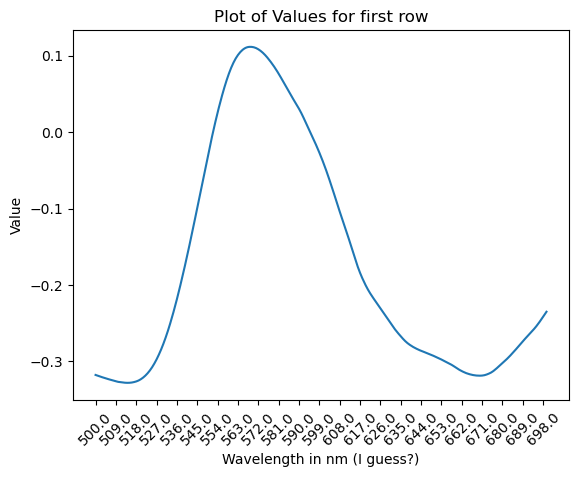

In [38]:
import matplotlib.pyplot as plt
row_to_plot = scaled_df.loc[0]
plt.plot(row_to_plot)
plt.title("Plot of Values for first row")

n = 18  # Show every nth label because there are to many to create a reasonable plot
x_ticks = range(0, len(row_to_plot), n)
x_labels = [df.columns[i] for i in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45) 

plt.xlabel("Wavelength in nm (I guess?)")
plt.ylabel("Value")
plt.show()

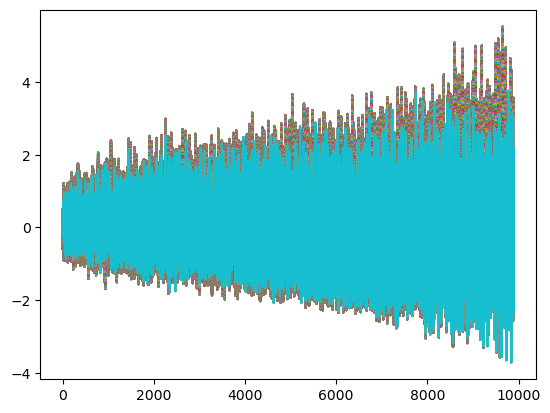

In [39]:
plt.plot(scaled_data)
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)

In [48]:
y_train

,x
6421,very_low
742,very_low
9534,low
3616,very_low
6465,very_low
...,...
5734,very_low
5191,very_low
5390,very_low
860,low


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt'],
    # 'criterion': ['gini', 'entropy'],
    # 'bootstrap': [True, False],
    # 'class_weight': [None, 'balanced'],
    # 'random_state': [42],
    # 'oob_score': [False, True]
}
y = y_train['x']

# Convert y to a 1D array
y = y.values.ravel()
y

array(['very_low', 'very_low', 'low', ..., 'very_low', 'low', 'very_low'],
      dtype=object)

In [72]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1'  # Set the scoring metric to F1 score
)

grid_search.fit(X_train, y)

/Users/moritzlindner/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/moritzlindner/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/moritzlindner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/moritzlindner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [42]:
# Create the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

/Users/moritzlindner/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))